In [3]:
import pandas as p
import numpy as n
from matplotlib import pyplot as plt
%matplotlib inline


In [4]:
df=p.read_csv("C:\\Users\\Chandrahas\\Downloads\\Bengaluru_House_Data.csv")

In [5]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
df2=df.drop(['society','balcony','availability','area_type'],axis="columns")

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()

In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\Chandrahas\AppData\Local\Temp\ipykernel_23304\4200255786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
def convert(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
type(df['total_sqft'][0])

str

In [17]:
def converting(x):
    z=x.split('-')
    if(len(z)==2):
        return (float(z[0])+float(z[1]))//2
    try:
        return float(x)
    except:
        return None
        

In [18]:
df4=df3.copy()

In [19]:
df4['total_sqft']=df4['total_sqft'].apply(converting)

In [20]:
df4.head(100)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
97,Sarjapura - Attibele Road,3 BHK,1330.0,2.0,48.00,3
98,Devasthanagalu,2 BHK,1200.0,2.0,65.00,2
99,T Dasarahalli,3 Bedroom,1200.0,3.0,90.00,3
100,Yeshwanthpur,3 BHK,2502.0,3.0,138.00,3


In [21]:
df3.shape

(13246, 6)

In [22]:
df5=df4.copy()

In [23]:
df5['price/sqft']=df4['price']*100000/df4['total_sqft']

In [24]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df5['location']=df5['location'].apply(lambda x:x.strip())

In [26]:
len(df5['location'].unique())

1293

In [27]:
locatio=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [28]:
locatio

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
less_than=locatio[locatio<=10]

In [30]:
less_than.head(50)

location
Basapura                   10
1st Block Koramangala      10
Gunjur Palya               10
Kalkere                    10
Sector 1 HSR Layout        10
Dairy Circle               10
Naganathapura              10
Sadashiva Nagar            10
Nagadevanahalli            10
BTM 1st Stage              10
Nagappa Reddy Layout       10
Dodsworth Layout           10
Ganga Nagar                10
2nd Phase JP Nagar          9
Volagerekallahalli          9
Yemlur                      9
4th Block Koramangala       9
Lingarajapuram              9
Medahalli                   9
Kaverappa Layout            9
Gollahalli                  9
Richmond Town               9
Vishwanatha Nagenahalli     9
Chennammana Kere            9
KUDLU MAIN ROAD             9
Banagiri Nagar              9
Peenya                      9
Ejipura                     9
Vignana Nagar               9
Mathikere                   9
Chandra Layout              9
Jakkur Plantation           9
Kamakshipalya               9
B

In [31]:
def replacing(x):
    if x in less_than:
        return 'other'
    else:
        return x

In [32]:
df5['location']=df5['location'].apply(replacing)

In [33]:
df5['location'].head(50)

0     Electronic City Phase II
1             Chikka Tirupathi
2                  Uttarahalli
3           Lingadheeranahalli
4                     Kothanur
5                   Whitefield
6             Old Airport Road
7                 Rajaji Nagar
8                 Marathahalli
9                        other
10                  Whitefield
11                  Whitefield
12          7th Phase JP Nagar
13                   Gottigere
14                    Sarjapur
15                 Mysore Road
16               Bisuvanahalli
17       Raja Rajeshwari Nagar
18                       other
19                       other
20                     Kengeri
21                  Binny Pete
22                 Thanisandra
23                   Bellandur
24                 Thanisandra
25                       other
26             Electronic City
27                  Whitefield
28            Ramagondanahalli
29             Electronic City
30                   Yelahanka
31               Bisuvanahalli
32      

In [34]:
df5[df5['total_sqft']/df5['bhk']<300]

,location,size,total_sqft,bath,price,bhk,price/sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [35]:
df6=df5[~(df5['total_sqft']/df5['bhk']<300)]

In [36]:
df6.shape

(12502, 7)

In [37]:
def remove_pps_outliers(df):
    df_out = p.DataFrame()
    for key, subdf in df.groupby('location'):
        m = n.mean(subdf['price/sqft'])
        st = n.std(subdf['price/sqft'])
        reduced_df = subdf[(subdf['price/sqft']>(m-st)) & (subdf['price/sqft']<=(m+st))]
        df_out = p.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

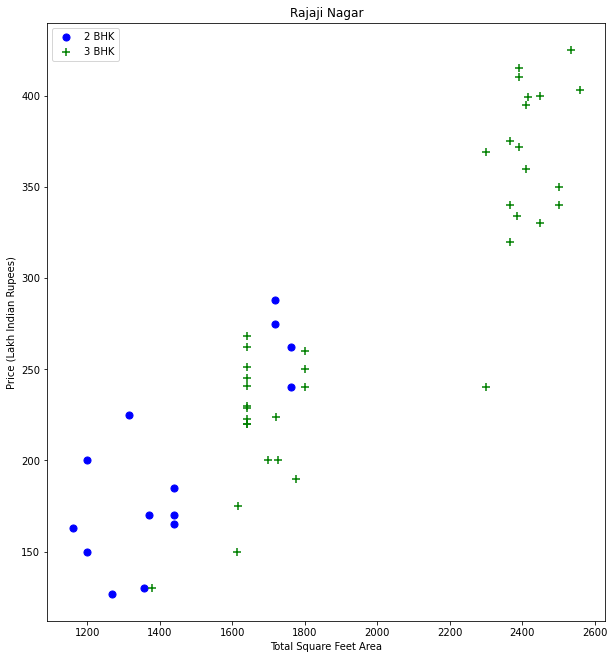

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(11)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = n.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': n.mean(bhk_df['price/sqft']),
                'std': n.std(bhk_df['price/sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = n.append(exclude_indices, bhk_df[bhk_df['price/sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

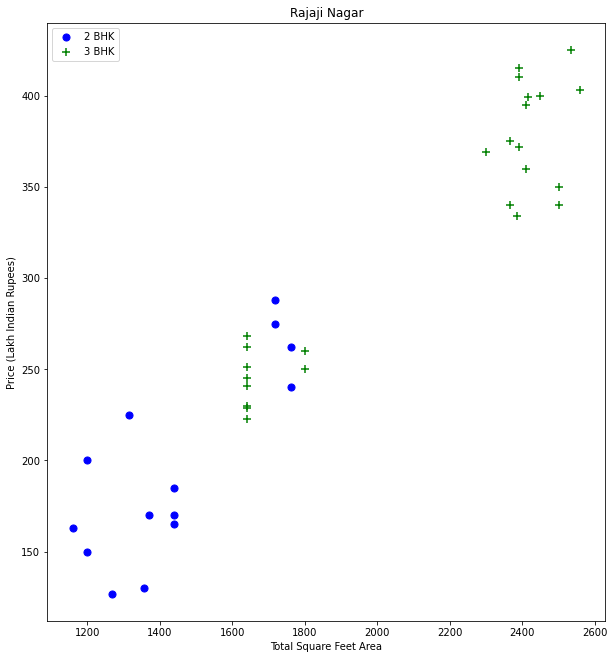

In [40]:
plot_scatter_chart(df8,"Rajaji Nagar")

In [41]:
df9=df8[df8['bath']<df8['bhk']+2]

In [42]:
df9.shape

(7251, 7)

In [61]:
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [64]:
df10=p.get_dummies(df9.location)

In [65]:
df10

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
cc=df10.drop(['other'],axis='columns')

In [71]:
df11=p.concat([df9,cc],axis='columns')

In [72]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
X=df11.drop(['price','location'],axis='columns')

In [92]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
y=df11.price

In [94]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr=LinearRegression()

In [98]:
lr.fit(X_train,y_train)

LinearRegression()

In [99]:
lr.score(X_test,y_test)

0.845229473337072

In [100]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [105]:
n.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [107]:
x=n.zeros(5)

In [108]:
x

array([0., 0., 0., 0., 0.])

In [109]:
def prpr(location,total_sqrt,bath,bhk):
    loca=n.where(X.columns==location)[0][0]
    x=n.zeros(len(X.columns))
    x[0]=total_sqrt
    x[1]=bath
    x[2]=bhk
    if(loca>=0):
        x[loca]=1
    return lr.predict([x])[0]
    

In [110]:
prpr('2nd Phase Judicial Layout',24342,3,2)

C:\Users\Chandrahas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1887.5202608705517

In [112]:
X_train.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6646,1564.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7353,3200.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7622,2444.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1840,1107.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7652,1400.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [120]:
prpr('Whitefield',3200.0,4.0,4)

C:\Users\Chandrahas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


210.0521489118736

In [119]:
df11[df11.total_sqft==3200]

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
507,Ardendale,3200.0,4.0,205.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1176,Benson Town,3200.0,4.0,350.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3526,Indira Nagar,3200.0,4.0,440.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4726,Kumaraswami Layout,3200.0,7.0,150.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5319,Old Airport Road,3200.0,4.0,280.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7353,Whitefield,3200.0,4.0,224.0,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9255,other,3200.0,3.0,260.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9835,other,3200.0,4.0,270.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
import pickle
with open('pro.pickel','wb') as f:
    pickle.dump(lr,f)

In [129]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
    
}
with open("col.json","w") as f:
    f.write(json.dumps(columns))